# LBPH - Local Binary Patterns Histograms

* Define-se um pixel e calcula a matriz resultante considerando  X >= pixel : 1 e X < pixel : 0. (Valor binário ao contornar o pixel).

* A partir disso tira-se o histograma para encontrar características predominantes de cada imagem.

In [49]:
import os
import cv2
import numpy as np
import seaborn as sns

from cv2.typing import MatLike

from sklearn.metrics import accuracy_score, confusion_matrix

from PIL import Image

In [18]:
base_dir = os.path.join(os.getcwd(), 'datasets', 'faces')

def display_image(window_name: str, image: MatLike):
    cv2.imshow(window_name, image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

def change_image_color(image: MatLike, color: int = cv2.COLOR_BGR2GRAY):
    return cv2.cvtColor(image, color)

def get_images(base_dir):
    paths = [os.path.join(base_dir, image) for image in os.listdir(base_dir)]

    faces = []
    ids = []

    for path in paths:
        image = Image.open(path).convert('L')
        image_np = np.array(image, 'uint8')
        id = int(path.split(".")[1].split("subject")[1])
        ids.append(id)
        faces.append(image_np)
    
    return faces, np.array(ids)

_ = get_images(os.path.join(base_dir, 'test'))

# Pré-Processamento 

In [19]:
test_images, test_ids = get_images(os.path.join(base_dir, 'test'))
train_images, train_ids = get_images(os.path.join(base_dir, 'train'))

## Treinamento LBPH

In [20]:
model_path = os.path.join(
    os.getcwd(), 'models', 'face_recognition', 'lbph_face_recognition_model.xml'
)
model = cv2.face.LBPHFaceRecognizer_create()
model.train(train_images, train_ids)
model.write(model_path)

In [21]:
model = cv2.face.LBPHFaceRecognizer_create()
model.read(model_path)

In [41]:
index = np.random.randint(0, len(test_images))
test_image = test_images[index]
test_image_id = test_ids[index]
# display_image(f'Pessoa {test_image_id}', test_image)

previsao = model.predict(test_image)
print("Valor previsto: ", previsao[0])
print("Confiança: ", previsao[1])
print("Valor real: ", test_image_id)

Valor previsto:  7
Confiança:  12.19380147221667
Valor real:  7


## Avaliação do modelo

In [45]:
previsoes = []
for image in test_images:
    previsao = model.predict(image)
    previsoes.append(previsao[0])

previsoes = np.array(previsoes)

acuracia = accuracy_score(test_ids, previsoes)
print("Acuracia: ", acuracia*100, "%")

Acuracia:  70.0 %


In [47]:
cm = confusion_matrix(test_ids, previsoes)
cm

array([[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1]], dtype=int64)

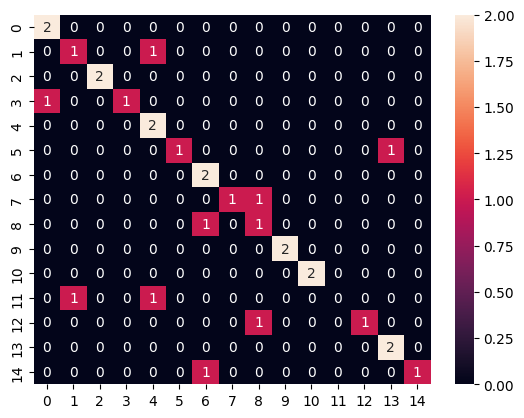

In [51]:
sns.heatmap(cm, annot=True);

## Melhorando o modelo - Params

In [65]:
model = cv2.face.LBPHFaceRecognizer_create()
# Raio de alcance dos pixels vizinhos
model.setRadius(4) 
# Quantidade de vizinhos mais próximos que serão usados efetivamente.
## Usar de forma adequada com setRadius.
model.setNeighbors(14)
# Tamanho da grade para gerar o histograma
model.setGridX(9)
model.setGridY(9)
# Indica a confiança da detecção
# model.setThreshold(1.7977)

model.train(train_images, train_ids)

Acuracia:  76.66666666666667 %


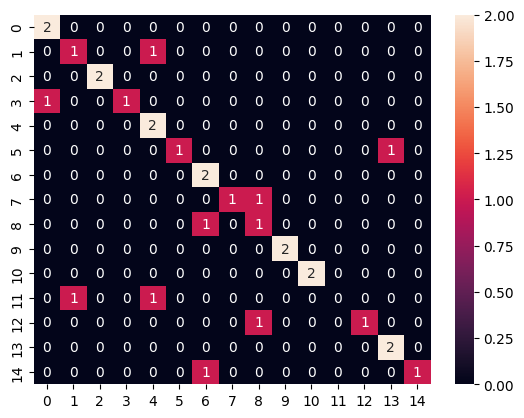

In [66]:
previsoes = []
for image in test_images:
    previsao = model.predict(image)
    previsoes.append(previsao[0])

previsoes = np.array(previsoes)

acuracia = accuracy_score(test_ids, previsoes)
print("Acuracia: ", acuracia*100, "%")
sns.heatmap(cm, annot=True);